In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats



from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, auc

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import sys
sys.path.insert(0, '../src')
sys.path.insert(0, '../data')

import functions


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
filepath = '../data/poas'
filenames = ['poas16.xlsx', 'poas17.xlsx', 'poas18.xlsx', 'poas19.xlsx', 'poas20.xlsx', 'poas21.xlsx', 'poas22.xlsx']
columns = ['DEP', 'PT', 'AGE', 'GT', 'EL', 'SC', 'CO', 'FA', 'ST']
poas = functions.clean_data(filepath, filenames, columns)
poas['TYPE'] = 'POAS'
poas


/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


,RANK,RACE,MOS,SEC,AB,RGR,PT,ED,MARITAL,DEP,...,GT,EL,SC,CO,FA,ST,WVR,RESULT,CODE,TYPE
0,SGT,O,42A,T,F,F,276,HSD,M,1,...,110,107,106,105,106,106,T,IVW,IVW,POAS
1,SSG,O,11B,T,F,F,242,HSD,M,1,...,111,116,119,118,119,116,F,IVW,IVW,POAS
2,SPC,H,42A,T,F,F,245,4YR,M,4,...,115,111,113,110,112,112,F,FAILED ARMY STANDARD 60/180 (HB),APFT,POAS
3,SGT,W,11B,T,F,F,295,HSD,M,1,...,108,116,116,119,120,117,F,SELECT,SEL,POAS
4,SPC,H,11C,F,T,F,282,4YR,M,1,...,124,121,120,122,122,123,F,IVW,IVW,POAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,PFC,B,92Y,F,F,F,298,4 YR,M,2,...,124,119,121,116,117,117,F,INVOLUNTARY WITHDRAWAL,IVW,POAS
2646,PFC,W,12B,T,F,F,228,HSD,M,1,...,103,108,105,109,109,105,F,PFA FAILURE,PFA,POAS
2647,SPC,W,25N,T,F,F,277,HSD,S,0,...,104,105,106,105,104,106,F,NON-SELECT,BRD,POAS
2648,PFC,W,14T,T,F,F,229,HSD,M,0,...,102,100,100,98,97,100,F,NON-SELECT,BRD,POAS


In [19]:
poas = poas[poas.SEC.notna()]
poas = poas[poas.DEP.notna()]
poas.DEP = poas.DEP.astype(int)

poas = poas[poas.PT.notna()]
poas.PT = poas.PT.astype(int)

poas.sample(5)

,RANK,RACE,MOS,SEC,AB,RGR,PT,ED,MARITAL,DEP,...,LANG,GT,EL,SC,CO,FA,ST,WVR,RESULT,CODE
1787,SPC,W,18X,T,T,F,228,4YR,S,0,...,0,124,118.0,119.0,119.0,119.0,122.0,F,APFT FAILURE,APFT
1933,SGT,B,18X,T,T,F,300,4 YR,S,0,...,1,129,115.0,116.0,112.0,114.0,119.0,T,SELECT,SEL
1870,SPC,W,11B,T,F,F,227,HSD,S,0,...,0,113,107.0,107.0,106.0,108.0,108.0,T,NON-SELECT,BRD
283,SGT,W,11B,T,F,F,266,HSD,M,1,...,1,116,112.0,112.0,112.0,114.0,114.0,F,SELECT,SEL
2521,SGT,W,35N,T,F,F,212,HSD,M,2,...,1,116,129.0,127.0,132.0,131.0,127.0,F,NON-SELECT,BRD


In [126]:
filepath = '../data/sfas'
filenames = ['sfas16.xlsx', 'sfas17.xlsx', 'sfas18.xlsx', 'sfas19.xlsx', 'sfas20.xlsx', 'sfas21.xlsx', 'sfas22.xlsx']
sfas = functions.clean_data(filepath, filenames, columns)
sfas['TYPE'] = 'SFAS'
sfas

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


,RANK,RACE,MOS,SEC,AB,RGR,PT,ED,MARITAL,DEP,...,GT,EL,SC,CO,FA,ST,WVR,RESULT,CODE,TYPE
0,SGT,B,11B,T,F,F,274,HSD,M,2,...,113,101,103,98,99,103,F,INVOLUNTARY WITHDRAW,IVW,SFAS
1,SPC,W,12K,F,F,F,275,GED,M,0,...,114,123,122,124,125,121,T,INVOLUNTARY WITHDRAW,IVW,SFAS
2,SGT,W,11B,T,T,F,290,HSD,M,2,...,110,119,114,112,113,119,F,SELECTED,SEL,SFAS
3,SGT,W,13B,T,F,T,297,HSD,M,1,...,115,112,112,111,112,113,F,SELECTED,SEL,SFAS
4,SPC,H,91B,T,T,F,247,GED,M,4,...,117,111,112,109,109,114,F,INVOLUNTARY WITHDRAW,IVW,SFAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8325,SGT,W,11B,T,F,F,292,HSD,S,0,...,101,108,110,111,111,109,F,INVOLUNTARY WITHDRAW,IVW,SFAS
8326,SSG,W,13F,T,T,T,300,6 YR,S,0,...,120,123,123,123,123,123,F,SELECTED,SEL,SFAS
8327,SGT,W,15T,T,F,F,294,HSD,M,0,...,129,130,131,128,128,130,F,SELECTED,SEL,SFAS
8331,SGT,W,92F,T,T,F,274,4 YR,D,0,...,135,141,140,142,143,140,F,PFA FAILURE,PFA,SFAS


GT       AxesSubplot(0.125,0.11;0.352273x0.77)
PT    AxesSubplot(0.547727,0.11;0.352273x0.77)
dtype: object

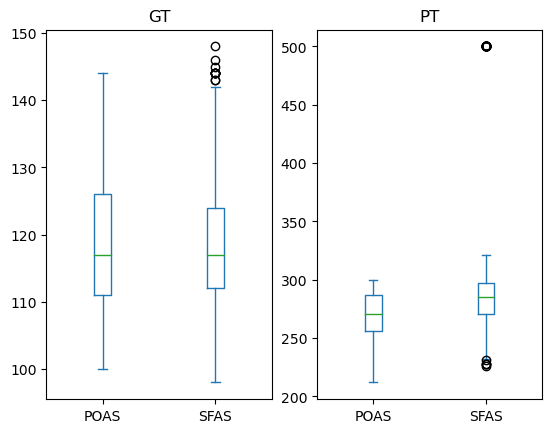

In [146]:
both = [poas, sfas]
combined = pd.concat(both, axis=0, ignore_index=True)

combined

combined_selected = functions.equal_column_val(combined, 'RESULT', 'SELECTED')
combined_selected

ages = combined_selected.groupby('AGE').size().reset_index(name='counts')
gt = combined_selected.groupby('GT').size().reset_index(name='counts')
pt = combined_selected.groupby('PT').size().reset_index(name='counts')

data = [ages.AGE, gt.GT, pt.PT]

# pdata = [pages.AGE, pgt.GT, ppt.PT]
# sdata = [sages.AGE, sgt.GT, spt.PT]
# fig, ax = plt.subplots()

# ax.boxplot(data)
# ax.boxplot(sdata)

combined_selected.plot.box(column=['PT', 'GT'], by='TYPE')





TypeError: plot got an unexpected keyword argument 'x'

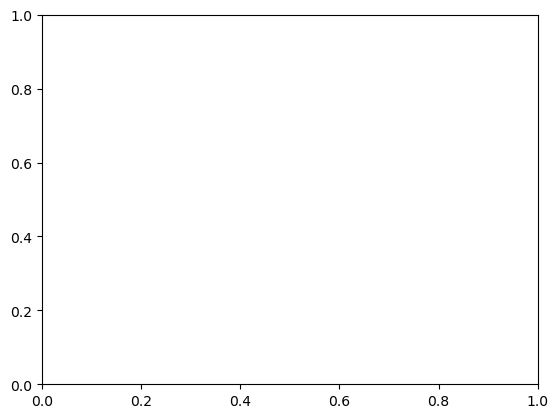

In [98]:
gt = poas_selected.groupby('GT').size().reset_index(name='counts')

fig, ax = plt.subplots()

ax.plot(x=gt.GT, y=gt.counts)